## Business Understanding

The rate of overdose deaths in Connecticut increased. In this case, Cocaine. In Connecticut, if you are found guilty of cocaine possession, for a first offense, you face up to seven years in prison as well as a maximum \\$50,000 fine. For a second offense, now you might spend up to 15 years in prison and a maximum \\$100,000 fine. In short, Cocaine is illegal in Connecticut. So, this model will predict if a person is involved in cocaine-related death based on race, age, sex, and death city.

## Data Understanding

The dataset provide a variant of drugs death. In this case, only need one drug which is Cocaine.

The following attributes will be used in the analysis:

- Age
- Sex
- Race
- DeathCity
- ResidenceState
- Cocaine

In [5]:
#Import pandas to read dataset from csv and assign it to a variable
import pandas as pd

df_csv = pd.read_csv('drug_deaths.csv')

In [6]:
# Finding unnecessary columns 
# Using columns to show all columns in dataset
df_csv.columns

Index(['Unnamed: 0', 'ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury',
       'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD',
       'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo'],
      dtype='object')

In [7]:
# Take all the needed columns
df_subset= df_csv[['Age', 'Sex','Race','DeathCity','ResidenceState','Cocaine']]
df_subset.head()

,Age,Sex,Race,DeathCity,ResidenceState,Cocaine
0,NaN,NaN,NaN,NaN,NaN,0
1,48.0,Male,Black,NORWALK,NaN,1
2,30.0,Female,White,DANBURY,CT,1
3,23.0,Male,White,GREENWICH,NY,0
4,22.0,Male,"Asian, Other",GREENWICH,NaN,0


In [8]:
# Mengambil data berdasarkan nilai CT (Connecticut)
df_subset_ct = df_subset[df_subset['ResidenceState'] == 'CT']

# Drop the Column of ResidenceState
df_subset_ct = df_subset_ct.drop(columns = 'ResidenceState')
df_subset_ct.describe(include='all')

,Age,Sex,Race,DeathCity,Cocaine
count,3442.000000,3439,3436,3442,3442.000000
unique,NaN,3,10,207,NaN
top,NaN,Male,White,HARTFORD,NaN
freq,NaN,2574,2690,393,NaN
mean,42.385822,NaN,NaN,NaN,0.298083
std,12.401400,NaN,NaN,NaN,0.457482
min,15.000000,NaN,NaN,NaN,0.000000
25%,32.000000,NaN,NaN,NaN,0.000000
50%,42.000000,NaN,NaN,NaN,0.000000
75%,52.000000,NaN,NaN,NaN,1.000000


In [9]:
# Change data type of Age from float to int
df_subset_ct = df_subset_ct.astype({'Age': int}) 

In [10]:
df_subset_ct.dtypes

Age           int64
Sex          object
Race         object
DeathCity    object
Cocaine       int64
dtype: object

# Impute

Imputing useful for fill in the missing data.

The data need to be checked either have a missing data or not.

To fill it up, simply use Simple Imputer for Categorical and KNN for Numerical.

In [11]:
# Sum of missing datas
df_subset_ct.isna().sum()

Age          0
Sex          3
Race         6
DeathCity    0
Cocaine      0
dtype: int64

In [12]:
# Percetage of missing datas
miss_values = (df_subset_ct.isnull().sum() / df_subset.shape[0]) * 100
miss_values

Age          0.000000
Sex          0.058766
Race         0.117532
DeathCity    0.000000
Cocaine      0.000000
dtype: float64

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer

In [14]:
# Perform imputation to a categorical column with SimpleImputer
cat_col = ['Sex','Race']
simpleImputer = SimpleImputer(strategy='most_frequent')

# Loop every categorical calumn and impute
for i in cat_col:
    # Store the column
    df_cat_copy = df_subset_ct[i].copy() 

    # Fit transform
    simple_imputed_data = simpleImputer.fit_transform(df_cat_copy.values.reshape(-1, 1))

    # Replace the data in the column
    df_subset_ct.loc[:, i] = simple_imputed_data.flatten()

In [15]:
# Check if there any missing value
df_subset_ct.isna().any()

Age          False
Sex          False
Race         False
DeathCity    False
Cocaine      False
dtype: bool

# Outlier

Outlier are value that are above/below the quantile (first and third). 

To check it, there are 2 methods will be used; IQR and Boxplot.

In [16]:
q1 = df_subset_ct.select_dtypes(exclude='object').quantile(0.25)
q3 = df_subset_ct.select_dtypes(exclude='object').quantile(0.75)
iqr = q3 - q1
iqr

Age        20.0
Cocaine     1.0
dtype: float64

In [17]:
batas_bawah = q1 - (1.5 * iqr)
batas_atas = q3 + (1.5 * iqr)

In [18]:
df_numerical = df_subset_ct.select_dtypes(exclude='object')
outlier = ((df_numerical < batas_bawah) | (df_numerical > batas_atas))
outlier

,Age,Cocaine
2,False,False
13,False,False
14,False,False
18,False,False
19,False,False
...,...,...
5097,False,False
5099,False,False
5100,False,False
5101,False,False


In [19]:
for col in outlier.columns :
    if df_subset_ct[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier[col].value_counts())
        print('-------------------')

Nama Kolom: Age
Age
False    3441
True        1
Name: count, dtype: int64
-------------------
Nama Kolom: Cocaine
Cocaine
False    3442
Name: count, dtype: int64
-------------------


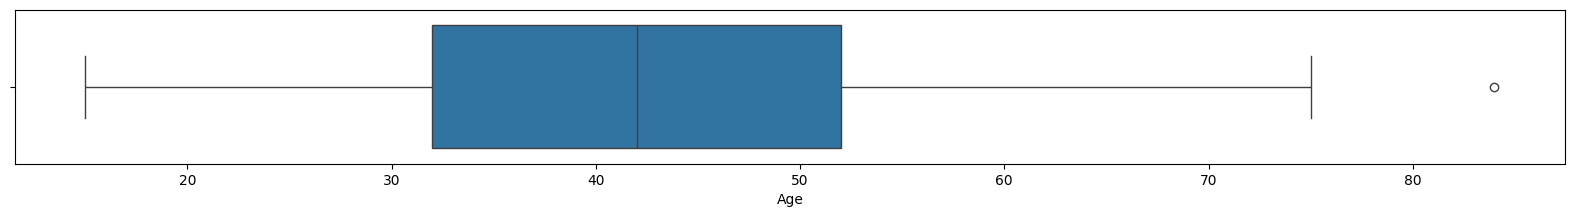

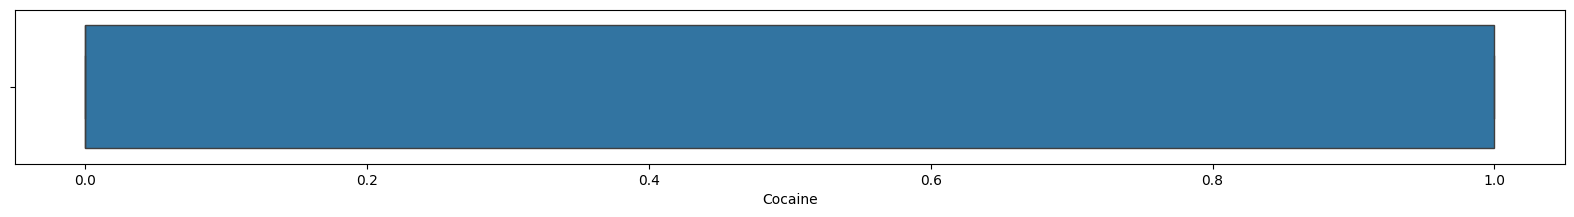

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df_outlier = df_subset_ct.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [21]:
from scipy.stats.mstats import winsorize

In [22]:
df_subset_ct.loc[:,'Age'] = winsorize(df_subset_ct.loc[:,'Age'], limits =[0,0.01])

<Axes: xlabel='Age'>

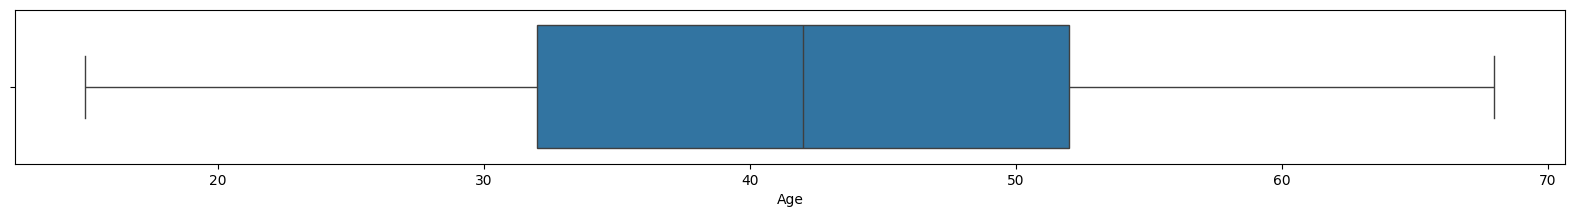

In [23]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df_subset_ct, x=df_subset_ct['Age'])

# Visualization

In [24]:
df_subset_ct.groupby('DeathCity').sum()['Cocaine'].sort_values(ascending=False)

DeathCity
HARTFORD       144
WATERBURY       94
BRIDGEPORT      85
NEW HAVEN       71
NEW BRITAIN     40
              ... 
QUINEBAUG        0
KENT             0
PROSPECT         0
PRESTON          0
SPRAGUE          0
Name: Cocaine, Length: 207, dtype: int64

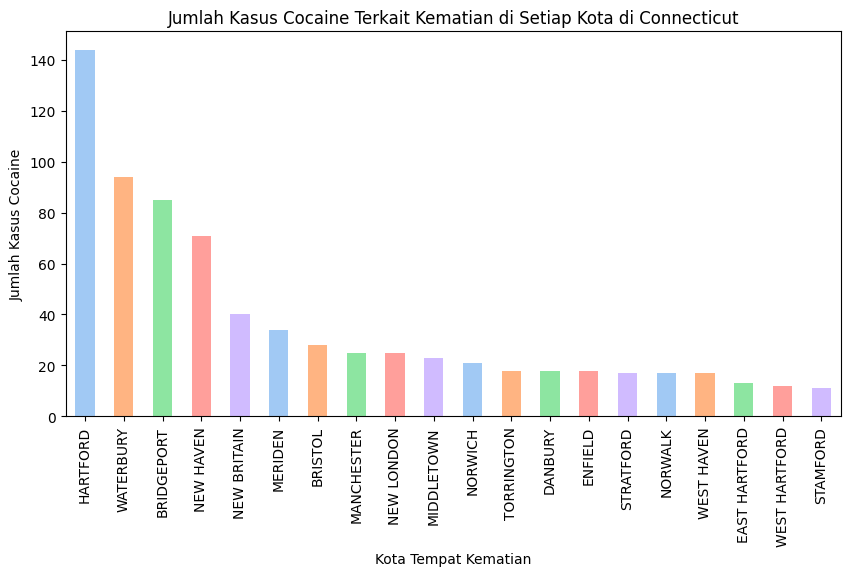

In [25]:
death_city_count = df_subset_ct.groupby('DeathCity').sum()['Cocaine'].sort_values(ascending=False)

plt.figure(figsize=(10,5))

myColors = sns.color_palette('pastel')[0:5]
death_city_count[0:20].plot(kind='bar',color= myColors)
plt.ylabel('Jumlah Kasus Cocaine')
plt.xlabel('Kota Tempat Kematian')
plt.title('Jumlah Kasus Cocaine Terkait Kematian di Setiap Kota di Connecticut')
plt.show()

In [26]:
cocaine_counts = df_subset_ct['Cocaine'].value_counts()

cocaine_counts = cocaine_counts.reindex([0, 1], fill_value=0)

cocaine_counts

Cocaine
0    2416
1    1026
Name: count, dtype: int64

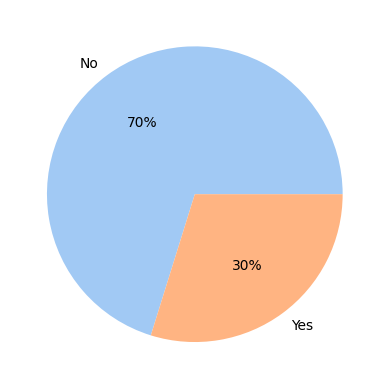

In [27]:
pieChartLabels = ['No','Yes']

myColors = sns.color_palette('pastel')


plt.pie(cocaine_counts, labels = pieChartLabels, colors = myColors, autopct='%.0f%%')
plt
plt.show()

# Modelling

Since the target (Cocaine) are binary (0, 1). So, Logistic Regression should suitable for it.

### Scaling and Encoding

In [28]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [30]:
# Encode
df_encode = df_subset_ct.copy()
cat_col = ['Sex','Race','DeathCity']

label_encoder = preprocessing.LabelEncoder()

df_encode.loc[:,cat_col] = df_encode.loc[:,cat_col].apply(label_encoder.fit_transform)

In [31]:
# Scaling
scaler = RobustScaler()
df_r_scale = df_encode.copy()
df_r_scale[['DeathCity']] = scaler.fit_transform(df_r_scale[['DeathCity']])
df_r_scale.head()

,Age,Sex,Race,DeathCity,Cocaine
2,30,0,9,-0.760234,1
13,50,1,9,-0.760234,0
14,29,1,2,0.058480,0
18,54,1,9,-0.093567,0
19,32,1,9,1.134503,0


### Logistic Regression

In [32]:
# Split data

x = df_r_scale.iloc[:,0:-1].values
y = df_r_scale.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [33]:
logis_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

logis_reg.fit(x_train, y_train)
y_pred = logis_reg.predict(x_test)

In [34]:
logr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
print(logr_diff.head())

   Actual value  Predicted value
0             1                0
1             0                0
2             0                0
3             1                0
4             0                0


In [35]:
target_names = ['Not Cocaine', 'By Cocaine']

print(metrics.classification_report(y_test
                            , y_pred
                            , target_names=target_names))

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

              precision    recall  f1-score   support

 Not Cocaine       0.72      0.99      0.83       731
  By Cocaine       0.68      0.05      0.09       302

    accuracy                           0.72      1033
   macro avg       0.70      0.52      0.46      1033
weighted avg       0.71      0.72      0.62      1033

Accuracy: 0.715


Text(0.5, 427.9555555555555, 'Predicted label')

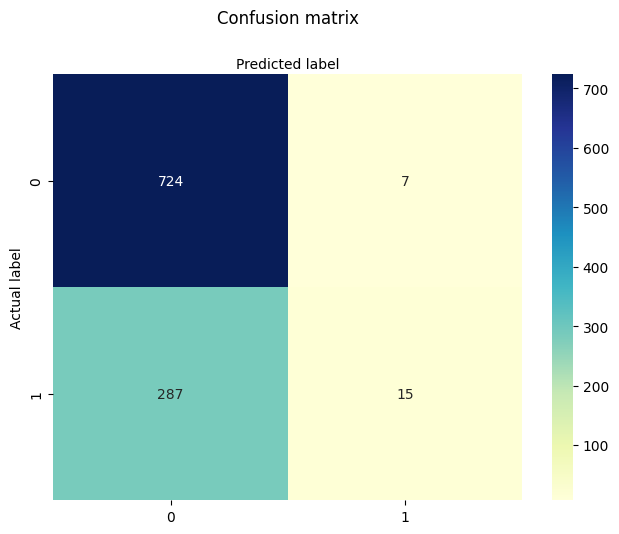

In [36]:
# Confussion matrix untuk melihat masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix)
            , annot=True
            , cmap="YlGnBu"
            ,fmt='g')

ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
#pip install imblearn

As shown above it seems there's a class imbalanced.

Using SMOTE to oversampling the class will balance it.

Oversampling with Smote
   Actual value  Predicted value
0             1                0
1             0                0
2             0                0
3             1                0
4             0                0
              precision    recall  f1-score      support
Not Cocaine    0.730909  0.824897  0.775064   731.000000
By Cocaine     0.384615  0.264901  0.313725   302.000000
accuracy       0.661181  0.661181  0.661181     0.661181
macro avg      0.557762  0.544899  0.544395  1033.000000
weighted avg   0.629669  0.661181  0.640191  1033.000000
### Accuracy: 0.661


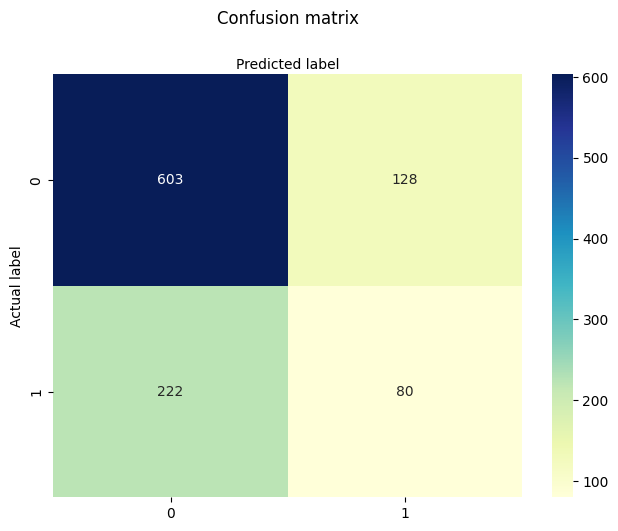

In [38]:
### Evaluate
from imblearn.over_sampling import SMOTE 
print("Oversampling with Smote")
x = df_r_scale.iloc[:,0:-1].values
y = df_r_scale.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

## Inisialisasi dan latih model
model = LogisticRegression()
model.fit(x_train_resampled, y_train_resampled)

    # Prediksi
y_pred = model.predict(x_test)

logr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
print(logr_diff.head())


target_names = ['Not Cocaine', 'By Cocaine']
# Menampilkan classification report sebagai DataFrame
classification_report_df = metrics.classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_df).transpose()

# Tampilkan DataFrame di Streamlit
print(classification_report_df)

# Menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("### Accuracy:", round(accuracy, 3))

# Confussion matrix untuk melihat masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix)
                , annot=True
                , cmap="YlGnBu"
                ,fmt='g')

ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()